# EmotionAI
---

## Hugging Face Datasets
---

In [1]:
!pip install datasets -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.2 MB/s eta 0:00:00


In [2]:
import huggingface_hub
import datasets
dir(datasets)

['Array2D',
 'Array3D',
 'Array4D',
 'Array5D',
 'ArrowBasedBuilder',
 'Audio',
 'AudioClassification',
 'AutomaticSpeechRecognition',
 'BeamBasedBuilder',
 'BuilderConfig',
 'ClassLabel',
 'Dataset',
 'DatasetBuilder',
 'DatasetDict',
 'DatasetInfo',
 'DownloadConfig',
 'DownloadManager',
 'DownloadMode',
 'Features',
 'GeneratorBasedBuilder',
 'Image',
 'ImageClassification',
 'IterableDataset',
 'IterableDatasetDict',
 'LanguageModeling',
 'Metric',
 'MetricInfo',
 'NamedSplit',
 'NamedSplitAll',
 'QuestionAnsweringExtractive',
 'ReadInstruction',
 'Sequence',
 'Split',
 'SplitBase',
 'SplitDict',
 'SplitGenerator',
 'SplitInfo',
 'StreamingDownloadManager',
 'SubSplitInfo',
 'Summarization',
 'TaskTemplate',
 'TextClassification',
 'Translation',
 'TranslationVariableLanguages',
 'Value',
 'VerificationMode',
 'Version',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'arrow_dataset',
 '

In [3]:
print(f"Total Hugging Face Datasets: {len(datasets.list_datasets())}")

<ipython-input-3-71571f4d8407>:1: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  print(f"Total Hugging Face Datasets: {len(datasets.list_datasets())}")


Total Hugging Face Datasets: 81982


### Load Dataset

#### Load Dataset from the Hugging Face Hub

In [4]:
from datasets import load_dataset

In [5]:
data = load_dataset(
    path = "emotion"
)

print(data)

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


#### Load the dataset from other than Hugging Face hub

```python
csv -> load_dataset("csv", data_files="my_file.csv")
text -> load_dataset("text", data_files="my_file.txt")
json -> load_dataset("json", data_files="my_file.jsonl")
```
* We can also use other arguments like `sep` if there is different `delimiter` in csv file.
* We can also use the arguments like `names` to provide the `list` of column names.

### Change data format from Dataset object to Pandas Dataframe

In [6]:
data["train"].to_pandas()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


In [7]:
data["train"].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [8]:
data["train"].column_names

['text', 'label']

In [9]:
train = data["train"].to_pandas()
train.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [10]:
def label_int2str(row):
  return data["train"].features["label"].int2str(row)

In [11]:
train["label_name"] = train["label"].apply(
    func = label_int2str
)
train.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


### Look at Class Distribution

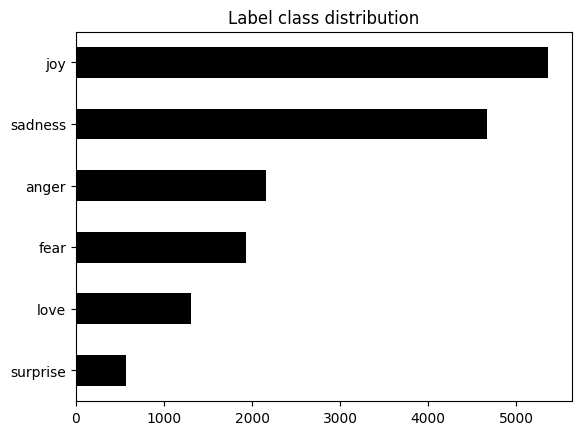

In [12]:
import matplotlib.pyplot as plt
train["label_name"].value_counts(ascending=True).plot.barh(
    grid = False,
    color = "black"
)
plt.title("Label class distribution")
plt.show()

The `joy` and `sadness` classes appear frequently, whereas `love` and `surprise` are about 5-10 times rarer.

How to deal with Imbalanced Data?
* Randomly oversample the Minority class.
* Randomly undersample the Majority class.
* Gather more labelled data from the underrepresented class.

> Never apply any sampling techniques before `Train-Test Split` of the data else it will cause data leakage.

### How long are the tweets?

**Tokens** are like atoms, they are the smallest unit of text.

* **Word Tokens** where each word is like an atom that forms a text.
* **Character Tokens** where each character is like an atom that forms a text.

> Transformers models have a disadvantage that is it can only take upto a certain amount of input tokens which is referred by `maximum context size`. **DistilBERT** has a `maximum context size` of 512.


#### What if input sequence > maximum context size of the model?
Then we have to `truncate` all the tokens after the maximum context size (512) and if those truncated tokens represent some important information then there will be `performance loss`.

In [13]:
train["text"].str.split() # Each word acts as a token

0                             [i, didnt, feel, humiliated]
1        [i, can, go, from, feeling, so, hopeless, to, ...
2        [im, grabbing, a, minute, to, post, i, feel, g...
3        [i, am, ever, feeling, nostalgic, about, the, ...
4                                [i, am, feeling, grouchy]
                               ...                        
15995    [i, just, had, a, very, brief, time, in, the, ...
15996    [i, am, now, turning, and, i, feel, pathetic, ...
15997                [i, feel, strong, and, good, overall]
15998    [i, feel, like, this, was, such, a, rude, comm...
15999    [i, know, a, lot, but, i, feel, so, stupid, be...
Name: text, Length: 16000, dtype: object

In [14]:
train["text"].str.split().apply(len) # Total no. of tokens in a text/tweet

0         4
1        21
2        10
3        18
4         4
         ..
15995    24
15996    20
15997     6
15998    14
15999    15
Name: text, Length: 16000, dtype: int64

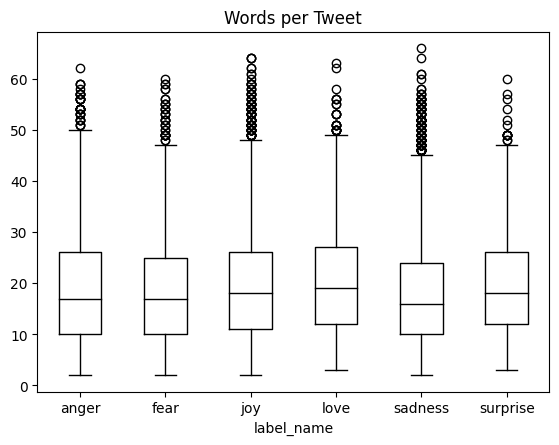

In [15]:
train["words_per_tweet"] = train["text"].str.split().apply(len)
train.boxplot(
    "words_per_tweet",
    by = "label_name",
    grid = False,
    color = "black",
    showfliers = 1
)

plt.title("Words per Tweet")
plt.suptitle("")
plt.show()

From the above plot we can say that the average words per tweet is about `15`, the maximum is near `70` which is way below than our `DistilBERT` model's maximum context size that is `512`. Therefore, we don't have to perform truncation.

## Text to Tokens

Well we can't feed raw strings to our Transformers Models as they need `numbers` to do their magic, and hence, we need to `tokenize` and `encode` the raw input strings.

* **Character Tokens :** Each character as input
* **Word Tokens :** Each word as input
* **Subword Tokens :** Splits words based on their frequency and meaning.

### Character Tokens

In character tokenization we feed **each character** as input to the model.

In [22]:
# Character Level Tokenization
text : str = "Hi, I am learning about character level tokenization..."

print("Character Level Tokenization")
ch_tokens = list(text)
print(ch_tokens)

Character Level Tokenization
['H', 'i', ',', ' ', 'I', ' ', 'a', 'm', ' ', 'l', 'e', 'a', 'r', 'n', 'i', 'n', 'g', ' ', 'a', 'b', 'o', 'u', 't', ' ', 'c', 'h', 'a', 'r', 'a', 'c', 't', 'e', 'r', ' ', 'l', 'e', 'v', 'e', 'l', ' ', 't', 'o', 'k', 'e', 'n', 'i', 'z', 'a', 't', 'i', 'o', 'n', '.', '.', '.']


This ain't enough. After tokenization we need to do `numericalization`, before feeding them into the model.

* **Numericalization** is conversion to Numericals.


In [27]:
token2int = {ch:i for ch, i in enumerate(sorted(set(ch_tokens)))}

print("Numericalization")
token2int

Numericalization


{0: ' ',
 1: ',',
 2: '.',
 3: 'H',
 4: 'I',
 5: 'a',
 6: 'b',
 7: 'c',
 8: 'e',
 9: 'g',
 10: 'h',
 11: 'i',
 12: 'k',
 13: 'l',
 14: 'm',
 15: 'n',
 16: 'o',
 17: 'r',
 18: 't',
 19: 'u',
 20: 'v',
 21: 'z'}

### Word Tokenization

### Subword Tokenization

Splits words based on their `frequency` and `meaning`. Famous algorithms are `SentencePiece`, Byte-Pair Encoding (BPE),WordPiece.